# Splitting Error Analysis BTCS

In [242]:
import sympy as smp
from sympy import latex
from sympy import I
Dt = smp.symbols("Δt")
alpha = smp.symbols("alpha", real=True)
beta = smp.symbols("beta", real=True)
z = -alpha+smp.I*beta
l = smp.symbols('l', integer=True, positive=True)  # Summation index
analytic = smp.series(smp.exp(z*Dt),Dt,0,3)
y_n = 1
analytic
#print(latex(analytic))

1 + Δt*(-alpha + I*beta) + Δt**2*(alpha**2/2 - I*alpha*beta - beta**2/2) + O(Δt**3)

In [244]:
#BTCS Base error

# Define the term inside the summation
term = 1/(1-Dt*z)

# Redefine the summation from l=3 to infinity
E = smp.collect(smp.expand((analytic - smp.series(term,Dt,0,5))/Dt),Dt)
E
#print(latex(E))
#We see it is first order error

Δt*(-alpha**2/2 + I*alpha*beta + beta**2/2) + O(Δt**2)

##BTCS DA

In [247]:
y_p = smp.symbols("y'")
y_pp = smp.symbols("y''")
y_p = smp.solve( y_n+Dt*(-alpha*y_p)-y_p,y_p)[0]
y_pp = smp.solve( y_p+Dt*(I*beta*y_pp)-y_pp,y_pp)[0]
BTCS_DA_error =  smp.collect(smp.expand((analytic - smp.series(y_pp,Dt,0,5)) /Dt),Dt)
BTCS_DA_error
#print(latex(BTCS_DA_error))
#smp.collect(smp.expand(smp.series(y_pp,Dt,0,5)),Dt)

Δt*(-alpha**2/2 + beta**2/2) + O(Δt**2)

We see that the error canceleation happesn again, this time splitting error is $-i\Delta t \alpha \beta$

#BTCS DAD

In [250]:
y_p = smp.symbols("y'")
y_pp = smp.symbols("y''")
y_ppp = smp.symbols("y'''")

y_p = smp.solve(y_n + (Dt/2)*(-alpha*y_p)-y_p,y_p)[0]
y_pp = smp.solve(y_p + (Dt)*(I*beta*y_pp)-y_pp,y_pp)[0]
y_ppp = smp.solve(y_pp + (Dt/2)*(-alpha*y_ppp)-y_ppp,y_ppp)[0]
BTCS_DAD_error =  smp.collect(smp.expand((analytic - smp.series(y_ppp,Dt,0,5)) /Dt),Dt)
BTCS_DAD_error
#print(latex(BTCS_DAD_error))

Δt*(-alpha**2/4 + beta**2/2) + O(Δt**2)

We see that the error is still poportional to first order but with a improvement to diffusion (over 4 instead of 2)

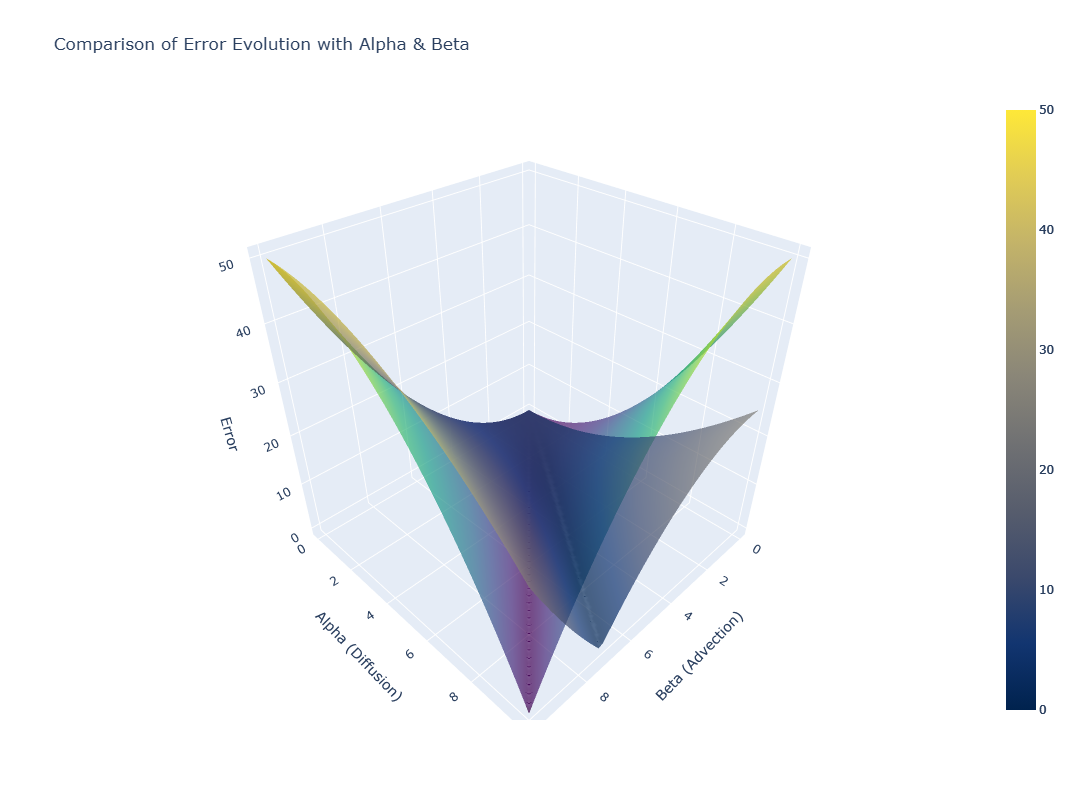

In [253]:
import numpy as np
import plotly.graph_objects as go

BTCS_DA_error_function = smp.lambdify((alpha, beta), smp.Abs(BTCS_DA_error.coeff(Dt, 1)), 'numpy')
BTCS_DAD_error_function = smp.lambdify((alpha, beta), smp.Abs(BTCS_DAD_error.coeff(Dt, 1)), 'numpy')
BTCS_error_function = smp.lambdify((alpha, beta), smp.Abs(E.coeff(Dt, 1)), 'numpy')

# Define range of alpha and beta
alpha_vals = np.linspace(0, 10, 50)
beta_vals = np.linspace(0, 10, 50)
Alpha, Beta = np.meshgrid(alpha_vals, beta_vals)


# Create the 3D surface plot using Plotly
Error1 = BTCS_DA_error_function(Alpha, Beta)
Error2 = BTCS_DAD_error_function(Alpha, Beta)
Error = BTCS_error_function(Alpha, Beta)

# Create the 3D plot with two surfaces
fig = go.Figure()

# Add the first surface
fig.add_trace(go.Surface(z=Error1, y=Alpha, x=Beta, colorscale='Viridis', opacity=0.7, name='DA'))

# Add the second surface
fig.add_trace(go.Surface(z=Error2, y=Alpha, x=Beta, colorscale='Cividis', opacity=0.7, name='DAD'))
#fig.add_trace(go.Surface(z=Error, y=Alpha, x=Beta, colorscale='Greys', opacity=0.7, name='No split'))

# Update layout for better visualization
fig.update_layout(
    title='Comparison of Error Evolution with Alpha & Beta',
    scene=dict(
        yaxis_title='Alpha (Diffusion)',
        xaxis_title='Beta (Advection)',
        zaxis_title='Error'
    ),
        autosize=True,
    height=800,  # Adjust height to make the view larger
    width=1000,  # Adjust width to make the view larger
)

# Show the interactive plot
fig.show()